# PLOTTING AND DASHBOARD

Now that the data are successfully cleaned, it is time to make the data dashboard.



In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("./ucr_final.csv", index_col=0)
data.head()

,murderandn,robbery,aggravated,burglary,larcenythe,motorvehic,arson,otherassau,forgeryand,fraud,...,drunkennes,disorderly,allotherof,population,year,state,decrim,medical,recreational,st
0,265,1413,4712,2617,14252,1150,72,24142,1607,8963,...,9190.0,3892.0,59027,4056000.0,1999,ALABAMA,0,0,0,AL
1,36,188,1089,605,3166,441,18,4391,101,225,...,15.0,990.0,14555,558000.0,1999,ALASKA,0,1,0,AK
2,243,1359,6040,4632,31589,3418,269,26033,1668,1889,...,0.0,17604.0,60661,4409000.0,1999,ARIZONA,0,0,0,AZ
3,171,779,4117,3384,13824,537,115,8175,2029,21649,...,17393.0,7718.0,85720,2428000.0,1999,ARKANSAS,0,0,0,AR
4,1770,18746,109685,49307,104527,19857,1783,78688,11200,9514,...,117184.0,17212.0,342230,33037000.0,1999,CALIFORNIA,0,1,0,CA


In [3]:
# lets cast the year column as date/time:

pd.to_datetime(data['year'], format="%Y")

0     1999-01-01
1     1999-01-01
2     1999-01-01
3     1999-01-01
4     1999-01-01
         ...    
968   2018-01-01
969   2018-01-01
970   2018-01-01
971   2018-01-01
972   2018-01-01
Name: year, Length: 973, dtype: datetime64[ns]

In [4]:
# now lets give the df a datetime index

data.set_index('year', inplace=True)
data.sort_index(inplace=True)

In [5]:
data.head()

,murderandn,robbery,aggravated,burglary,larcenythe,motorvehic,arson,otherassau,forgeryand,fraud,...,liquorlaws,drunkennes,disorderly,allotherof,population,state,decrim,medical,recreational,st
year,,,,,,,,,,,,,,,,,,,,,
1999,265,1413,4712,2617,14252,1150,72,24142,1607,8963,...,6671,9190.0,3892.0,59027,4056000.0,ALABAMA,0,0,0,AL
1999,36,188,1089,605,3166,441,18,4391,101,225,...,1539,15.0,990.0,14555,558000.0,ALASKA,0,1,0,AK
1999,243,1359,6040,4632,31589,3418,269,26033,1668,1889,...,25067,0.0,17604.0,60661,4409000.0,ARIZONA,0,0,0,AZ
1999,171,779,4117,3384,13824,537,115,8175,2029,21649,...,3521,17393.0,7718.0,85720,2428000.0,ARKANSAS,0,0,0,AR
1999,1770,18746,109685,49307,104527,19857,1783,78688,11200,9514,...,31671,117184.0,17212.0,342230,33037000.0,CALIFORNIA,0,1,0,CA


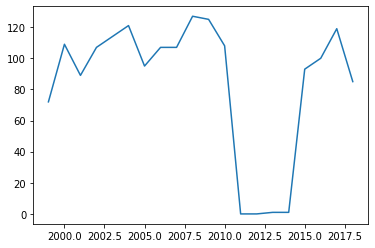

In [6]:
table = data[data['state'] == 'ALABAMA']

plt.plot(table['arson'])

In [7]:
data.columns

Index(['murderandn', 'robbery', 'aggravated', 'burglary', 'larcenythe',
       'motorvehic', 'arson', 'otherassau', 'forgeryand', 'fraud',
       'embezzleme', 'stolenprop', 'vandalism', 'weaponscar', 'prostituti',
       'sexoffense', 'drugabusev', 'gambling', 'offensesag', 'drivingund',
       'liquorlaws', 'drunkennes', 'disorderly', 'allotherof', 'population',
       'state', 'decrim', 'medical', 'recreational', 'st'],
      dtype='object')

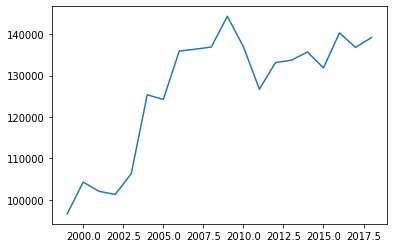

In [8]:
table = data[data['state'] == "TEXAS"]

plt.plot(table['drugabusev'])

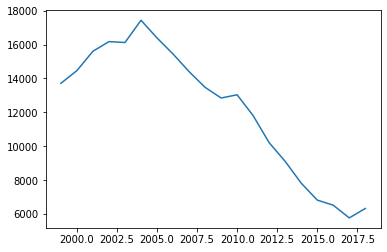

In [9]:
plt.plot(table['fraud'])

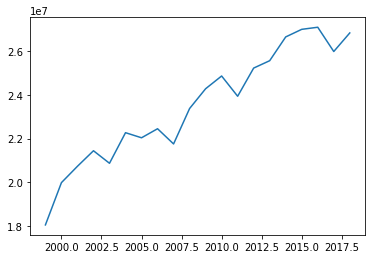

In [10]:
plt.plot(table['population'])

In [11]:
# now we need to create some kind of dict or table to be able to decode the columns:

data.columns

Index(['murderandn', 'robbery', 'aggravated', 'burglary', 'larcenythe',
       'motorvehic', 'arson', 'otherassau', 'forgeryand', 'fraud',
       'embezzleme', 'stolenprop', 'vandalism', 'weaponscar', 'prostituti',
       'sexoffense', 'drugabusev', 'gambling', 'offensesag', 'drivingund',
       'liquorlaws', 'drunkennes', 'disorderly', 'allotherof', 'population',
       'state', 'decrim', 'medical', 'recreational', 'st'],
      dtype='object')

In [12]:
crime_dict = {}

crime_list = ["Murder/Manslaughter",
              "Robbery",
              "Aggravated Assault",
              "Burglary",
              "Larceny/Theft",
              "Auto Theft",
              "Arson", 
              "Other Assaults",
              "Forgery/Counterfieting",
              "Fraud",
              "Embezzlement",
              "Buying/Receving/Possessing Stolen Property",
              "Vandalism",
              "Illegal Weapons Possession",
              "Prositution/Vice",
              "Other Sex Offenses",
              "Drug Abuse Violations",
              "Gambling",
              "Domestic/Family Offenses",
              "DUI/DWI",
              "Liqour Law Violations",
              "Public Drunkenness",
              "Disorderly Conduct",
              "All Other Offenses"
             ]
crime_cols = list(data.drop(columns=['state', 'population', 'decrim', 'medical', 'recreational']).columns)

crime_dict = dict(zip(crime_cols, crime_list))
crime_dict

{'murderandn': 'Murder/Manslaughter',
 'robbery': 'Robbery',
 'aggravated': 'Aggravated Assault',
 'burglary': 'Burglary',
 'larcenythe': 'Larceny/Theft',
 'motorvehic': 'Auto Theft',
 'arson': 'Arson',
 'otherassau': 'Other Assaults',
 'forgeryand': 'Forgery/Counterfieting',
 'fraud': 'Fraud',
 'embezzleme': 'Embezzlement',
 'stolenprop': 'Buying/Receving/Possessing Stolen Property',
 'vandalism': 'Vandalism',
 'weaponscar': 'Illegal Weapons Possession',
 'prostituti': 'Prositution/Vice',
 'sexoffense': 'Other Sex Offenses',
 'drugabusev': 'Drug Abuse Violations',
 'gambling': 'Gambling',
 'offensesag': 'Domestic/Family Offenses',
 'drivingund': 'DUI/DWI',
 'liquorlaws': 'Liqour Law Violations',
 'drunkennes': 'Public Drunkenness',
 'disorderly': 'Disorderly Conduct',
 'allotherof': 'All Other Offenses'}

In [13]:
# now we can pickle this guy too:

with open('crime_dict.pkl', "ab") as data_out:
    pickle.dump(crime_dict, data_out)

In [14]:
# now lets create a dataframe that incorporates the two letter code, the proper titled spelling for the state, 
# and the data from the legalization

with open('policy_dict.pkl', "rb") as data_in:
    policy_dict = pickle.load(data_in)

legal_df = pd.DataFrame(policy_dict).T

legal_df.head()

,Decriminalized,Legalized Medical,Legalized Recreational
ALABAMA,NA,NA,NA
ALASKA,2003,na,2014
ARIZONA,NA,2010,NA
ARKANSAS,NA,NA,NA
CALIFORNIA,2010,1996,2016


In [15]:
legal_df['State'] = legal_df.index
legal_df.head()

,Decriminalized,Legalized Medical,Legalized Recreational,State
ALABAMA,NA,NA,NA,ALABAMA
ALASKA,2003,na,2014,ALASKA
ARIZONA,NA,2010,NA,ARIZONA
ARKANSAS,NA,NA,NA,ARKANSAS
CALIFORNIA,2010,1996,2016,CALIFORNIA


In [17]:
# now lets add the abbreviated state title:

with open('state_codes.pkl', "rb") as data_in:
    state_codes = pickle.load(data_in)
    
    
def return_st_code(row):
    state = row['State']
    return state_codes[state]

legal_df['st'] = legal_df.apply(return_st_code, axis=1)
legal_df.head()

,Decriminalized,Legalized Medical,Legalized Recreational,State,st
ALABAMA,NA,NA,NA,ALABAMA,AL
ALASKA,2003,na,2014,ALASKA,AK
ARIZONA,NA,2010,NA,ARIZONA,AZ
ARKANSAS,NA,NA,NA,ARKANSAS,AR
CALIFORNIA,2010,1996,2016,CALIFORNIA,CA


In [18]:
# now that we have that, lets fix the state names:

states_corr = pd.read_json('./states_hash.json', orient='index')
states_corr.head()

,0
AL,Alabama
AK,Alaska
AS,American Samoa
AZ,Arizona
AR,Arkansas


In [19]:
# now lets add the fixed state name:

def return_st_code(row):
    st = row['st']
    return states_corr.loc[st, :]

legal_df['State'] = legal_df.apply(return_st_code, axis=1)
legal_df.head()

,Decriminalized,Legalized Medical,Legalized Recreational,State,st
ALABAMA,NA,NA,NA,Alabama,AL
ALASKA,2003,na,2014,Alaska,AK
ARIZONA,NA,2010,NA,Arizona,AZ
ARKANSAS,NA,NA,NA,Arkansas,AR
CALIFORNIA,2010,1996,2016,California,CA


In [20]:
# much better. In fact I like it so much, lets do it to the original dataframe as well

data['state'] = data.apply(return_st_code, axis=1)
data['state'].head()

year
1999       Alabama
1999        Alaska
1999       Arizona
1999      Arkansas
1999    California
Name: state, dtype: object

In [24]:
# While we're at it, lets clean up the columns on the df:
new_cols = []
for col in data.columns:
    if col in crime_dict.keys():
        new_cols.append(crime_dict[col])
    else:
        new_cols.append(col)
data.columns = new_cols
data.head()

,Murder/Manslaughter,Robbery,Aggravated Assault,Burglary,Larceny/Theft,Auto Theft,Arson,Other Assaults,Forgery/Counterfieting,Fraud,...,Liqour Law Violations,Public Drunkenness,Disorderly Conduct,All Other Offenses,population,state,decrim,medical,recreational,st
year,,,,,,,,,,,,,,,,,,,,,
1999,265,1413,4712,2617,14252,1150,72,24142,1607,8963,...,6671,9190.0,3892.0,59027,4056000.0,Alabama,0,0,0,AL
1999,36,188,1089,605,3166,441,18,4391,101,225,...,1539,15.0,990.0,14555,558000.0,Alaska,0,1,0,AK
1999,243,1359,6040,4632,31589,3418,269,26033,1668,1889,...,25067,0.0,17604.0,60661,4409000.0,Arizona,0,0,0,AZ
1999,171,779,4117,3384,13824,537,115,8175,2029,21649,...,3521,17393.0,7718.0,85720,2428000.0,Arkansas,0,0,0,AR
1999,1770,18746,109685,49307,104527,19857,1783,78688,11200,9514,...,31671,117184.0,17212.0,342230,33037000.0,California,0,1,0,CA


In [25]:
# let's pickle both of those and call it good!

with open('data.pkl', "ab") as data_out:
    pickle.dump(data, data_out)
    

with open('legal.pkl', "ab") as data_out:
    pickle.dump(legal_df, data_out)

In [28]:
import plotly.graph_objects as go


Int64Index([1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='year', length=973)


In [33]:
df = data[data.index==2015]
df.head()

,Murder/Manslaughter,Robbery,Aggravated Assault,Burglary,Larceny/Theft,Auto Theft,Arson,Other Assaults,Forgery/Counterfieting,Fraud,...,Liqour Law Violations,Public Drunkenness,Disorderly Conduct,All Other Offenses,population,state,decrim,medical,recreational,st
year,,,,,,,,,,,,,,,,,,,,,
2015,283,1088,3830,3008,15558,727,93,18207,1184,4119,...,1739,7107.0,2187.0,57649,3663706.0,Alabama,0,0,0,AL
2015,47,294,1734,485,2540,361,67,4350,39,230,...,1100,80.0,795.0,13025,734820.0,Alaska,1,1,1,AK
2015,134,1047,5750,2672,26717,1064,156,20492,706,1505,...,10079,12521.0,16750.0,62041,5108556.0,Arizona,0,1,0,AZ
2015,123,589,3682,1977,13357,364,73,11084,700,1145,...,1890,6710.0,2185.0,58085,2686917.0,Arkansas,0,0,0,AR
2015,1431,15841,87717,44146,65037,17303,1185,81413,4860,6499,...,12186,78534.0,4674.0,299745,38908726.0,California,1,1,0,CA


In [35]:
df.index = range(len(df))
type(df)

pandas.core.frame.DataFrame

In [36]:
df['st']

0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CT
7     DE
8     FL
9     GA
10    HI
11    ID
12    IL
13    IN
14    IA
15    KS
16    KY
17    LA
18    ME
19    MD
20    MA
21    MI
22    MN
23    MS
24    MO
25    MT
26    NE
27    NV
28    NH
29    NJ
30    NM
31    NY
32    NC
33    ND
34    OH
35    OK
36    OR
37    PA
38    RI
39    SC
40    SD
41    TN
42    TX
43    UT
44    VT
45    VA
46    WA
47    WV
48    WI
49    WY
Name: st, dtype: object

In [38]:
year=2015
tar = 'Fraud'

fig = go.Figure(data=go.Choropleth(
    locations=df['st'],
    z=df[tar] / df['population'] * 100_000,
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
#     text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD"
))

fig.update_layout(
    title_text=f"{year}, arrest rate for {tar}",
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()


In [42]:
crimes


[{'label': 'Murder/Manslaughter', 'value': 'Murder/Manslaughter'},
 {'label': 'Robbery', 'value': 'Robbery'},
 {'label': 'Aggravated Assault', 'value': 'Aggravated Assault'},
 {'label': 'Burglary', 'value': 'Burglary'},
 {'label': 'Larceny/Theft', 'value': 'Larceny/Theft'},
 {'label': 'Auto Theft', 'value': 'Auto Theft'},
 {'label': 'Arson', 'value': 'Arson'},
 {'label': 'Other Assaults', 'value': 'Other Assaults'},
 {'label': 'Forgery/Counterfieting', 'value': 'Forgery/Counterfieting'},
 {'label': 'Fraud', 'value': 'Fraud'},
 {'label': 'Embezzlement', 'value': 'Embezzlement'},
 {'label': 'Buying/Receving/Possessing Stolen Property',
  'value': 'Buying/Receving/Possessing Stolen Property'},
 {'label': 'Vandalism', 'value': 'Vandalism'},
 {'label': 'Illegal Weapons Possession',
  'value': 'Illegal Weapons Possession'},
 {'label': 'Prositution/Vice', 'value': 'Prositution/Vice'},
 {'label': 'Other Sex Offenses', 'value': 'Other Sex Offenses'},
 {'label': 'Drug Abuse Violations', 'value':

In [43]:
col_list = list(data.drop(columns=['state', 'st', 'population', "decrim", "medical", "recreational"]).columns)

col_list.sort()



data['total'] = data[col_list].apply(np.sum, axis=1)

In [44]:
data['total']

year
1999     174624.0
1999      36001.0
1999     260024.0
1999     210457.0
1999    1456210.0
          ...    
2018     266970.0
2018     170798.0
2018      29130.0
2018     242136.0
2018      28142.0
Name: total, Length: 973, dtype: float64

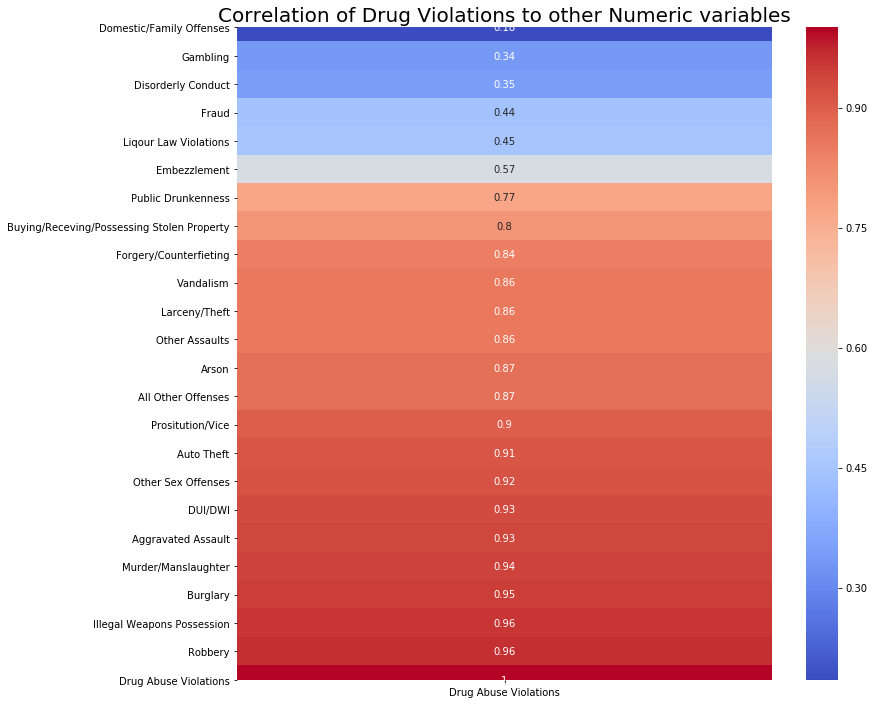

In [46]:
plt.figure(figsize = (12, 12))
plt.title('Correlation of Drug Violations to other Numeric variables', fontsize=20)
sns.heatmap(data[col_list].corr()[['Drug Abuse Violations']].sort_values('Drug Abuse Violations'), annot=True, cmap='coolwarm')